In [1]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
df = pd.read_csv('training.csv', names=['Timestamp', 'Hour', 'Ad', 'Browser', 'Platform', 'Region', 'Clicked'])

In [3]:
df.head()

,Timestamp,Hour,Ad,Browser,Platform,Region,Clicked
0,2014-04-13 05:42:22,5,Candy Smash,Other,iOS,South America,1
1,2014-04-14 06:50:09,6,Candy Smash,Opera,iOS,Europe,0
2,2014-04-07 04:39:27,4,Clash of Tribes,Safari,Android,North America,0
3,2014-04-25 07:14:35,7,Clash of Tribes,Internet Explorer,Android,Australia,0
4,2014-04-19 16:41:58,16,NBA Jam,Google Chrome,Unknown,North America,0


In [4]:
# Exploring the Data
print 'DF Len', len(df)
print 'Number of Clicks', df.Clicked.sum()
print "\nNumber of unique values:"
for col in df.columns:
    print col, df[col].nunique()

DF Len 10000
Number of Clicks 3889

Number of unique values:
Timestamp 9976
Hour 24
Ad 3
Browser 6
Platform 4
Region 6
Clicked 2


In [5]:
# There are no missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
Timestamp    10000 non-null object
Hour         10000 non-null int64
Ad           10000 non-null object
Browser      10000 non-null object
Platform     10000 non-null object
Region       10000 non-null object
Clicked      10000 non-null int64
dtypes: int64(2), object(5)
memory usage: 546.9+ KB


In [6]:
df['Day'] = df['Timestamp'].apply(lambda x: parser.parse(x).strftime("%A"))
df['Year'] = df['Timestamp'].apply(lambda x: int(x.split('-')[0]))
df['Month'] = df['Timestamp'].apply(lambda x: int(x.split('-')[1]))

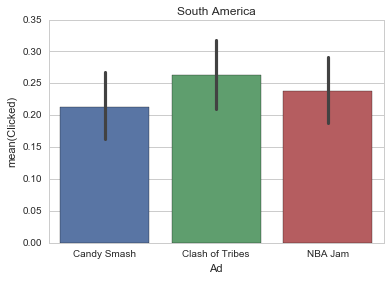

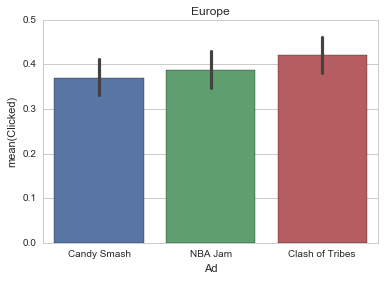

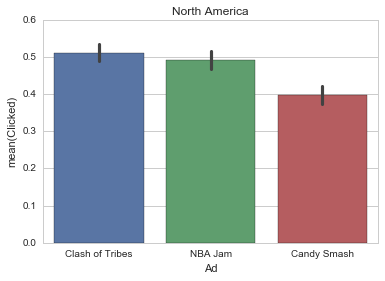

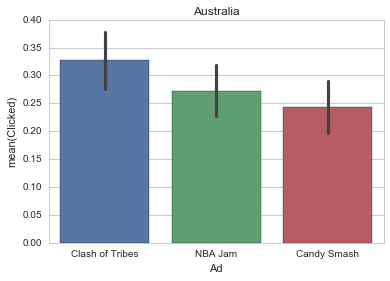

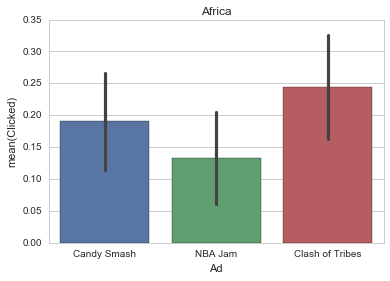

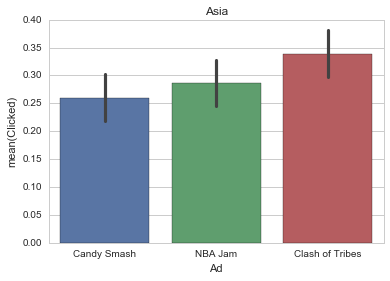

In [7]:
# Plot Ad Vs. Region
sns.set_style("whitegrid")
for region in df.Region.unique():
    sns.barplot(x='Ad', y="Clicked", data=df[df.Region == region])
    sns.plt.title(region)
    plt.show()

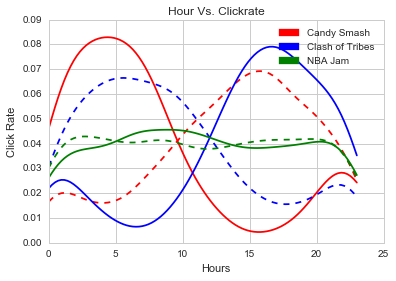

In [8]:
legend_handles = []
for ad, color in zip(df.Ad.unique(), ['red', 'blue', 'green']):

    density0 = gaussian_kde(df[(df.Clicked == 0) & (df.Ad == ad)]['Hour'])
    density1 = gaussian_kde(df[(df.Clicked == 1) & (df.Ad == ad)]['Hour'])
    # density.covariance_factor = lambda : .25
    # density._compute_covariance()
    hours = np.linspace(0, 23, 100)

    legend_handles.append(mpatches.Patch(color=color, label=ad))
    plt.legend(handles=legend_handles)
    plt.title('Hour Vs. Clickrate')
    plt.xlabel('Hours')
    plt.ylabel('Click Rate')
    plt.plot(hours ,density0(hours), ls='--', color=color)
    plt.plot(hours ,density1(hours), color=color)


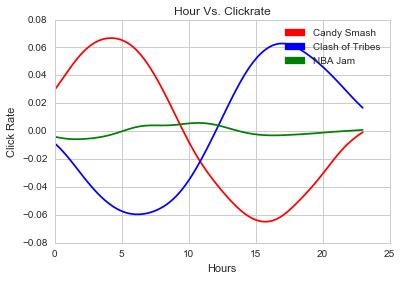

In [9]:
legend_handles = []
for ad, color in zip(df.Ad.unique(), ['red', 'blue', 'green']):

    density0 = gaussian_kde(df[(df.Clicked == 0) & (df.Ad == ad)]['Hour'])
    density1 = gaussian_kde(df[(df.Clicked == 1) & (df.Ad == ad)]['Hour'])
    hours = np.linspace(0, 23, 100)

    legend_handles.append(mpatches.Patch(color=color, label=ad))
    plt.legend(handles=legend_handles)
    plt.title('Hour Vs. Clickrate')
    plt.xlabel('Hours')
    plt.ylabel('Click Rate')
    plt.plot(hours ,density1(hours)-density0(hours), color=color)


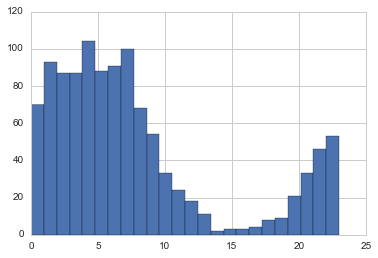

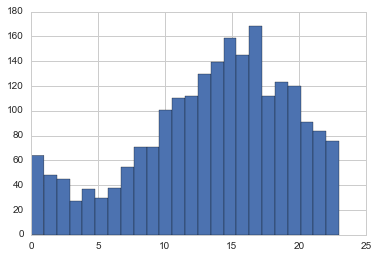

In [11]:
bar1 = df[(df.Clicked == 1) & (df.Ad == 'Candy Smash')]['Hour']
plt.hist(bar1, bins=24)
plt.show()

bar2 = df[(df.Clicked == 0) & (df.Ad == 'Candy Smash')]['Hour']
plt.hist(bar2, bins=24)
plt.show()


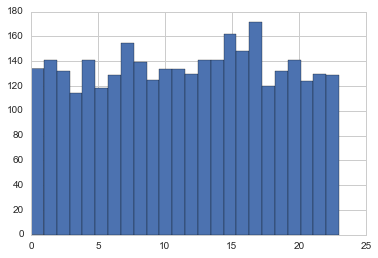

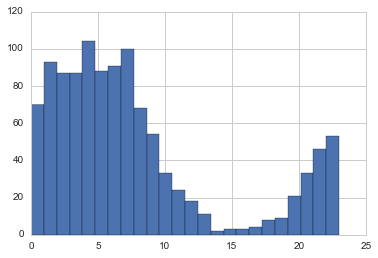

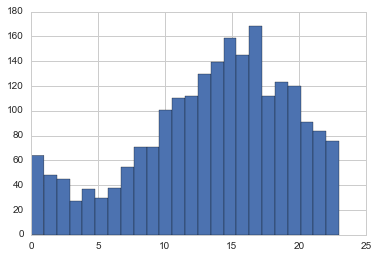

In [12]:
plt.hist(df[(df.Ad == 'Candy Smash')]['Hour'], bins=24)
plt.show()
plt.hist(df[(df.Clicked == 1) & (df.Ad == 'Candy Smash')]['Hour'], bins=24)
plt.show()
plt.hist(df[(df.Clicked == 0) & (df.Ad == 'Candy Smash')]['Hour'], bins=24)
plt.show()

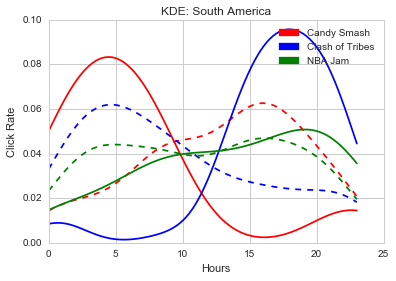

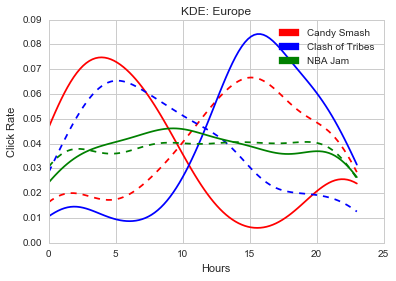

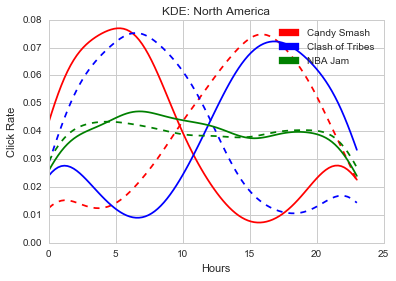

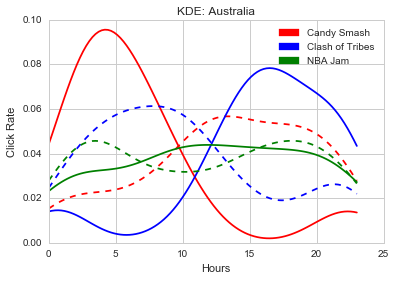

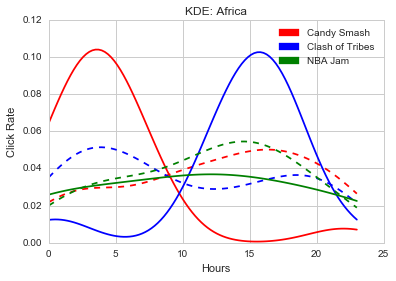

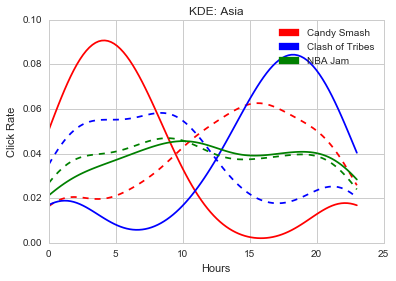

In [15]:
for region in df.Region.unique():
    legend_handles = []
    for ad, color in zip(df.Ad.unique(), ['red', 'blue', 'green']):

        density0 = gaussian_kde(df[(df.Clicked == 0) & (df.Ad == ad) & (df.Region == region)]['Hour'], bw_method=None)
        density1 = gaussian_kde(df[(df.Clicked == 1) & (df.Ad == ad) & (df.Region == region)]['Hour'], bw_method=None)
        # density.covariance_factor = lambda : .25
        # density._compute_covariance()
        hours = np.linspace(0, 23, 100)

        legend_handles.append(mpatches.Patch(color=color, label=ad))
        plt.legend(handles=legend_handles)

        plt.plot(hours ,density0(hours), ls='--', color=color)
        plt.plot(hours ,density1(hours), color=color)
        
           
    plt.title(region)
    plt.xlabel('Hours')
    plt.ylabel('Click Rate')
    plt.show()

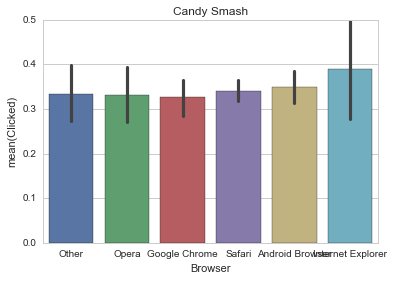

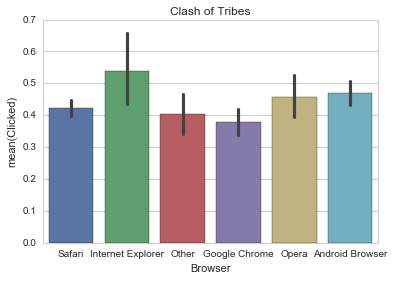

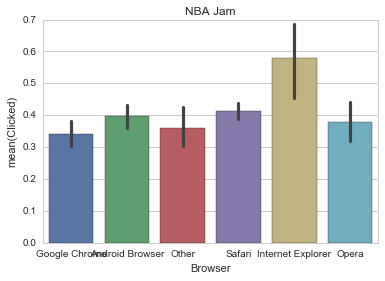

In [14]:
for ad in df.Ad.unique():
    sns.barplot(x='Browser', y="Clicked", data=df[df.Ad == ad])
    sns.plt.title(ad)
    plt.show()

In [ ]:
for ad in df.Ad.unique():
    sns.barplot(x='Platform', y="Clicked", data=df[df.Ad == ad])
    sns.plt.title(ad)
    plt.show()

In [ ]:
for ad in df.Ad.unique():
    sns.barplot(x='Browser', y="Clicked", data=df[df.Ad == ad])
    sns.plt.title(ad)
    plt.show()

In [ ]:
sns.barplot(x='Platform', y="Clicked", data=df)
sns.plt.title(ad)
plt.show()

In [ ]:
sns.barplot(x='Day', y="Clicked", data=df)
plt.show()

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
df.head()

In [ ]:
# Convert Catigorical string to ints for modeling.
for col in ['Ad', 'Browser', 'Platform', 'Region', 'Day']:
    catigories = list(df[col].unique())
    df[col] = df[col].apply(lambda x: catigories.index(x))

In [ ]:
df_clicked = df[df.Clicked == 1]

In [ ]:
#features = ['Hour', 'Browser', 'Platform', 'Region', 'Day', 'Month']
features = ['Hour']

for n in range(1, 20):
    #clf = GradientBoostingClassifier(n_estimators=n, max_features='auto')
    #clf = RandomForestClassifier(n_estimators=20, max_features='auto')
    clf = AdaBoostClassifier(n_estimators=n)
    AdaBoostClassifier
    scores = cross_val_score(clf, df_clicked[features], df_clicked['Ad'], cv=5)
    print n, scores.mean()

In [ ]:
scores = cross_val_score(clf, df_clicked[features], df_clicked['Ad'], cv=5)
scores

In [ ]:
df.head()

In [ ]:
df_group = df.drop(['Timestamp', 'Browser', 'Platform'], axis=1).groupby(['Ad', 'Hour', 'Region'], as_index=False).mean()

In [ ]:
df_group.head()

In [ ]:
sns.regplot(x='Hour', y='Clicked', scatter=True, order=3, data=df_group[df_group.Ad == 'Candy Smash'])
plt.ylim(-1,1.5)

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
# # Convert Catigorical string to ints for modeling.
# for col in ['Region']:
#     catigories = list(df_group[col].unique())
#     df_group[col] = df_group[col].apply(lambda x: catigories.index(x))

In [ ]:
formula='Clicked ~ Hour + I(Hour**4)'
model = smf.ols(formula='Clicked ~ Hour + I(Hour**3)', data=df_group[df_group.Ad == 'Candy Smash']).fit()
model.summary()


In [ ]:
df_group.head()

In [ ]:
# Dummy Region to binary features
df_group = pd.concat([df_group, pd.get_dummies(df_group['Region'])], axis=1).drop('Region', axis=1)

# Add feature Hour*3 so the model can be fitted to the third polynomial
df_group['Hour**3'] = df_group['Hour'].apply(lambda x: x**3)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

In [ ]:
ad = 'Candy Smash'
features = df_group.columns - ['Ad', 'Clicked']
y = df_group[df_group.Ad == ad]['Clicked']
X = sm.add_constant(df_group[df_group.Ad == ad][features])
model = sm.OLS(y, X).fit()
print model.summary()
print model.predict(X)

In [ ]:
plt.scatter()

In [ ]:
df.head()

In [ ]:
df['Timestamp'].apply(lambda x: round(float(x.split(':')[0][-2:]) + \
    float(x.split(':')[1])/60, 0))

In [ ]:
abs([-2, 4, 5])